## **Installing Tensorflow GPU**

In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 489.6 MB 22 kB/s 


In [1]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

## **Cloning TFOD 2.0 Github**

In [3]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 68221, done.
remote: Total 68221 (delta 0), reused 0 (delta 0), pack-reused 68221
Receiving objects: 100% (68221/68221), 576.49 MiB | 21.42 MiB/s, done.
Resolving deltas: 100% (47925/47925), done.


In [4]:
!pwd

/content


In [5]:
cd /content/models/research

/content/models/research


In [6]:
pwd

'/content/models/research'

In [7]:
# From within TensorFlow/models/research/
!protoc object_detection/protos/*.proto --python_out=.

In [8]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 9.64 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [9]:
cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


In [10]:
!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-Y7dWVB/python3.7-3.7.12=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-Y7dWVB/python3.7-3.7.12=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/n

In [11]:
cp -r pycocotools /content/models/research

## **Install the Object Detection API**

In [12]:
cd /content/models/research

/content/models/research


In [13]:
pwd

'/content/models/research'

In [14]:
# From within TensorFlow/models/research/
!cp object_detection/packages/tf2/setup.py .

In [15]:
!python -m pip install --use-feature=2020-resolver .

Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 9.8 MB 17.1 MB/s 
     |████████████████████████████████| 352 kB 48.0 MB/s 
     |████████████████████████████████| 1.8 MB 48.2 MB/s 
     |████████████████████████████████| 23.1 MB 55.6 MB/s 
     |████████████████████████████████| 47.6 MB 88 kB/s 
     |████████████████████████████████| 4.9 MB 46.3 MB/s 
     |████████████████████████████████| 1.1 MB 47.1 MB/s 
     |████████████████████████████████| 1.2 MB 50.2 MB/s 
     |████████████████████████████████| 213 kB 52.0 MB/s 
     |████████████████████████████████| 43 kB 

In [16]:
# From within TensorFlow/models/research/
!python object_detection/builders/model_builder_tf2_test.py

Running tests under Python 3.7.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-12-24 20:33:43.451746: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W1224 20:33:43.889860 140168160831360 model_builder.py:1100] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.35s
I1224 20:33:44.220348 140168160831360 test_util.py:2309] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.35s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 0.68s
I1224 20:33:44.899003 140168160831360 test

## **Creating all the Folders**

In [17]:
cd /content

/content


In [18]:
import os
paths = {
          'Training_demo_path': os.path.join('Training_demo'),
          'annotations_path': os.path.join('Training_demo','annotations'),
          'exported_models_path': os.path.join('Training_demo','exported_models'),
          'images_path': os.path.join('Training_demo','images'),
          # 'test_path': os.path.join('Training_demo','images','test'),
          # 'train_path': os.path.join('Training_demo','images','train'),
          'models_path': os.path.join('Training_demo','models'),
          'pretrained_models_path': os.path.join('Training_demo','pre-trained-models'),
}


In [19]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

## **Creating Label Map**

In [20]:
labels = [{'name':'helmet', 'id':1},{'name':'head', 'id':2}]

with open('/content/Training_demo/annotations/label_map.pbtxt', 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

## **Loading Model from Model Zoo**

In [21]:
cd /content/Training_demo/pre-trained-models

/content/Training_demo/pre-trained-models


In [22]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz

--2021-12-24 20:34:23--  http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 66.102.1.128, 2a00:1450:400c:c06::80
Connecting to download.tensorflow.org (download.tensorflow.org)|66.102.1.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30736482 (29M) [application/x-tar]
Saving to: ‘efficientdet_d0_coco17_tpu-32.tar.gz’

efficientdet_d0_coc 100%[===================>]  29.31M  70.7MB/s    in 0.4s    

2021-12-24 20:34:24 (70.7 MB/s) - ‘efficientdet_d0_coco17_tpu-32.tar.gz’ saved [30736482/30736482]



In [23]:
!tar -xvf efficientdet_d0_coco17_tpu-32.tar.gz

efficientdet_d0_coco17_tpu-32/
efficientdet_d0_coco17_tpu-32/checkpoint/
efficientdet_d0_coco17_tpu-32/checkpoint/ckpt-0.data-00000-of-00001
efficientdet_d0_coco17_tpu-32/checkpoint/checkpoint
efficientdet_d0_coco17_tpu-32/checkpoint/ckpt-0.index
efficientdet_d0_coco17_tpu-32/pipeline.config
efficientdet_d0_coco17_tpu-32/saved_model/
efficientdet_d0_coco17_tpu-32/saved_model/saved_model.pb
efficientdet_d0_coco17_tpu-32/saved_model/assets/
efficientdet_d0_coco17_tpu-32/saved_model/variables/
efficientdet_d0_coco17_tpu-32/saved_model/variables/variables.data-00000-of-00001
efficientdet_d0_coco17_tpu-32/saved_model/variables/variables.index


In [24]:
cd /content/Training_demo/images

/content/Training_demo/images


In [25]:
! gdown --id 1I4jxJFXo3kt7SaLsK5tNwQN4jdTBDnNs

Downloading...
From: https://drive.google.com/uc?id=1I4jxJFXo3kt7SaLsK5tNwQN4jdTBDnNs
To: /content/Training_demo/images/test.zip
100% 249M/249M [00:04<00:00, 58.1MB/s]


In [26]:
! gdown --id 1QDqkqs7_dL6YnVn4gbHlxopIPfPahXLv

Downloading...
From: https://drive.google.com/uc?id=1QDqkqs7_dL6YnVn4gbHlxopIPfPahXLv
To: /content/Training_demo/images/train.zip
100% 998M/998M [00:11<00:00, 86.7MB/s]


In [27]:
!unzip test.zip

Archive:  test.zip
  inflating: test/hard_hat_workers0.png  
  inflating: test/hard_hat_workers0.xml  
  inflating: test/hard_hat_workers1.png  
  inflating: test/hard_hat_workers1.xml  
  inflating: test/hard_hat_workers10.png  
  inflating: test/hard_hat_workers10.xml  
  inflating: test/hard_hat_workers100.png  
  inflating: test/hard_hat_workers100.xml  
  inflating: test/hard_hat_workers101.png  
  inflating: test/hard_hat_workers101.xml  
  inflating: test/hard_hat_workers102.png  
  inflating: test/hard_hat_workers102.xml  
  inflating: test/hard_hat_workers103.png  
  inflating: test/hard_hat_workers103.xml  
  inflating: test/hard_hat_workers104.png  
  inflating: test/hard_hat_workers104.xml  
  inflating: test/hard_hat_workers105.png  
  inflating: test/hard_hat_workers105.xml  
  inflating: test/hard_hat_workers106.png  
  inflating: test/hard_hat_workers106.xml  
  inflating: test/hard_hat_workers107.png  
  inflating: test/hard_hat_workers107.xml  
  inflating: test/hard_

In [28]:
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/hard_hat_workers2272.png  
  inflating: train/hard_hat_workers2272.xml  
  inflating: train/hard_hat_workers2273.png  
  inflating: train/hard_hat_workers2273.xml  
  inflating: train/hard_hat_workers2275.png  
  inflating: train/hard_hat_workers2275.xml  
  inflating: train/hard_hat_workers2276.png  
  inflating: train/hard_hat_workers2276.xml  
  inflating: train/hard_hat_workers2277.png  
  inflating: train/hard_hat_workers2277.xml  
  inflating: train/hard_hat_workers2278.png  
  inflating: train/hard_hat_workers2278.xml  
  inflating: train/hard_hat_workers2279.png  
  inflating: train/hard_hat_workers2279.xml  
  inflating: train/hard_hat_workers228.png  
  inflating: train/hard_hat_workers228.xml  
  inflating: train/hard_hat_workers2280.png  
  inflating: train/hard_hat_workers2280.xml  
  inflating: train/hard_hat_workers2281.png  
  inflating: train/hard_hat_workers2281.xml  
  inflating: train/hard_hat_wor

## **Creating TF Records**

In [29]:
cd /content/Training_demo

/content/Training_demo


In [30]:
# Create train data:
!python generate_tfrecord.py -x /content/Training_demo/images/train -l /content/Training_demo/annotations/label_map.pbtxt -o /content/Training_demo/annotations/train.record

# Create test data:
!python generate_tfrecord.py -x /content/Training_demo/images/test -l /content/Training_demo/annotations/label_map.pbtxt -o /content/Training_demo/annotations/test.record

Traceback (most recent call last):
  File "generate_tfrecord.py", line 178, in <module>
    tf.app.run()
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/platform/app.py", line 40, in run
    _run(main=main, argv=argv, flags_parser=_parse_flags_tolerate_undef)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 303, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 251, in _run_main
    sys.exit(main(argv))
  File "generate_tfrecord.py", line 168, in main
    tf_example = create_tf_example(group, path)
  File "generate_tfrecord.py", line 142, in create_tf_example
    classes.append(class_text_to_int(row['class']))
  File "generate_tfrecord.py", line 111, in class_text_to_int
    return label_map_dict[row_label]
KeyError: 'person'
Traceback (most recent call last):
  File "generate_tfrecord.py", line 178, in <module>
    tf.app.run()
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/platform/ap

## **Training Phase**

In [ ]:
cd /content/Training_demo

/content/Training_demo


In [31]:
!python model_main_tf2.py --model_dir=/content/Training_demo/models/effdet --pipeline_config_path=/content/Training_demo/models/effdet/pipeline.config

2021-12-24 20:40:20.130168: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I1224 20:40:20.136330 139839660910464 mirrored_strategy.py:376] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I1224 20:40:20.141415 139839660910464 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1224 20:40:20.141595 139839660910464 config_util.py:552] Maybe overwriting use_bfloat16: False
I1224 20:40:20.156856 139839660910464 ssd_efficientnet_bifpn_feature_extractor.py:143] EfficientDet EfficientNet backbone version: efficientnet-b0
I1224 20:40:20.156997 139839660910464 ssd_efficientnet_bifpn_feature_extractor.py:144] 

## **Exporting Model**

In [32]:
cd /content/Training_demo

/content/Training_demo


In [33]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/Training_demo/models/effdet/pipeline.config --trained_checkpoint_dir /content/Training_demo/models/effdet --output_directory /content/Training_demo/exported_models/effdet

2021-12-24 21:20:24.670007: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I1224 21:20:24.679085 139853563914112 ssd_efficientnet_bifpn_feature_extractor.py:143] EfficientDet EfficientNet backbone version: efficientnet-b0
I1224 21:20:24.679309 139853563914112 ssd_efficientnet_bifpn_feature_extractor.py:144] EfficientDet BiFPN num filters: 64
I1224 21:20:24.679404 139853563914112 ssd_efficientnet_bifpn_feature_extractor.py:146] EfficientDet BiFPN num iterations: 3
I1224 21:20:24.683740 139853563914112 efficientnet_model.py:147] round_filter input=32 output=32
I1224 21:20:24.710343 139853563914112 efficientnet_model.py:147] round_filter input=32 output=32
I1224 21:20:24.710491 139853563914112 efficientnet_model.py:147] round_filter input=16 output=16
I1224 21:20:24.780681 139853563914112 efficientnet_model.py:147] round_filter input=16 output=16
I

Zipping

In [34]:
!zip -r /content/Training_demo/exported_models/effdet.zip /content/Training_demo/exported_models

  adding: content/Training_demo/exported_models/ (stored 0%)
  adding: content/Training_demo/exported_models/effdet/ (stored 0%)
  adding: content/Training_demo/exported_models/effdet/saved_model/ (stored 0%)
  adding: content/Training_demo/exported_models/effdet/saved_model/saved_model.pb (deflated 93%)
  adding: content/Training_demo/exported_models/effdet/saved_model/assets/ (stored 0%)
  adding: content/Training_demo/exported_models/effdet/saved_model/variables/ (stored 0%)
  adding: content/Training_demo/exported_models/effdet/saved_model/variables/variables.index (deflated 78%)
  adding: content/Training_demo/exported_models/effdet/saved_model/variables/variables.data-00000-of-00001 (deflated 36%)
  adding: content/Training_demo/exported_models/effdet/checkpoint/ (stored 0%)
  adding: content/Training_demo/exported_models/effdet/checkpoint/ckpt-0.data-00000-of-00001 (deflated 36%)
  adding: content/Training_demo/exported_models/effdet/checkpoint/ckpt-0.index (deflated 80%)
  addi

## **Load Train Model From Checkpoint**

In [35]:
cd /content

/content


In [36]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [ ]:
paths_test = {
          'exported_model_path': os.path.join('Testing_demo'),
          'my_model_path': os.path.join('Testing_demo','my_model'),
          'checkpoint_path': os.path.join('Testing_demo','my_model','checkpoint'),
          'saved_model_path': os.path.join('Testing_demo','my_model','saved_model'),
          'assets_path': os.path.join('Testing_demo','my_model','saved_model','assets'),
          'variables_path': os.path.join('Testing_demo','my_model','saved_model','variables'),
          'test_path': os.path.join('Testing_demo','test'),
          'test_images_path': os.path.join('Testing_demo','test','test_images'),
          'test_video_path': os.path.join('Testing_demo','test','test_video')
}

In [ ]:
for path in paths_test.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [99]:
! gdown --id 1TdwY5X3seEkvwesFreoLVgPOxcY1V4aA

Downloading...
From: https://drive.google.com/uc?id=1TdwY5X3seEkvwesFreoLVgPOxcY1V4aA
To: /content/Training_demo/my_model3.zip
100% 331M/331M [00:06<00:00, 54.1MB/s]


In [103]:
!unzip my_model3.zip

Archive:  my_model3.zip
replace content/Training_demo/exported_models/my_model3/saved_model/saved_model.pb? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: content/Training_demo/exported_models/my_model3/saved_model/saved_model.pb  
replace content/Training_demo/exported_models/my_model3/saved_model/variables/variables.index? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: content/Training_demo/exported_models/my_model3/saved_model/variables/variables.index  
replace content/Training_demo/exported_models/my_model3/saved_model/variables/variables.data-00000-of-00001? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: content/Training_demo/exported_models/my_model3/saved_model/variables/variables.data-00000-of-00001  y

replace content/Training_demo/exported_models/my_model3/checkpoint/ckpt-0.data-00000-of-00001? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: content/Training_demo/exported_models/my_model3/checkpoint/ckpt-0.data-00000-of-00001  y

replace content/Training

In [104]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file('/content/Training_demo/exported_models/my_model3/pipeline.config')
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join('/content/Training_demo/exported_models/my_model3/checkpoint', 'ckpt-0')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

## **Detections on Test Images**

In [105]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [106]:
cd /content

/content


In [107]:
category_index = label_map_util.create_category_index_from_labelmap('/content/Training_demo/annotations/label_map.pbtxt')


In [124]:
IMAGE_PATH = os.path.join('/content/Training_demo/images/test', 'hard_hat_workers4094.png')
IMAGE_PATH

'/content/Training_demo/images/test/hard_hat_workers4094.png'

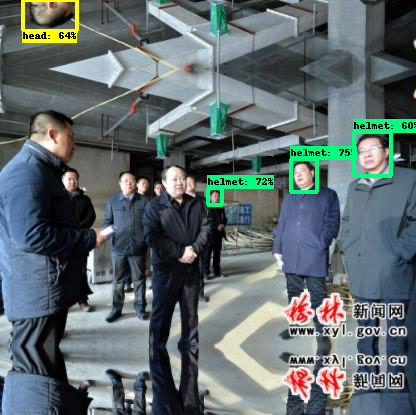

In [129]:
from google.colab.patches import cv2_imshow
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)

detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

# image_np_with_detections = image_np.copy()
# # Visualization of the results of a detection.
# viz_utils.visualize_boxes_and_labels_on_image_array(
#     image_np_with_detections,
#     detections['detection_boxes'],
#     detections['detection_classes']+1,
#     detections['detection_scores'],
#     category_index,
#     instance_masks=detections.get('detection_masks_reframed', None),
#     use_normalized_coordinates=True,
#     max_boxes_to_draw=20,
#     line_thickness=5)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=20,
            min_score_thresh=.5,
            agnostic_mode=False)


cv2_imshow(image_np_with_detections)
plt.show()

In [128]:
 detections['detection_classes']+label_id_offset

array([1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2])

### **Detections on Video Feed**

In [58]:
import os
import pathlib
import cv2
import PIL

import matplotlib
import matplotlib.pyplot as plt

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
import tensorflow_hub as hub

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import io
import html
import time

Detector Function

In [122]:
def run_inference_for_single_image(image, live_cam):
    
    # convert image into numpy
    image = np.asarray(image)
    #print('Converted image into numpy type:', type(image))
    
    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(np.expand_dims(image, 0), dtype=tf.float32)
    #print('Converted numpy into tensor format:', input_tensor)
    
    
    # Run inference
    if not live_cam:
      start_time = time.time()
      output_dict = detect_fn(input_tensor)
      end_time = time.time()
      print(f"Inference time: {np.ceil(end_time-start_time)} seconds per frame")

    output_dict = detect_fn(input_tensor)
    num_detections = int(output_dict.pop('num_detections')) # 300

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    
    output_dict = {key: value[0, :num_detections].numpy()
                   for key, value in output_dict.items()}
    
    output_dict['num_detections'] = num_detections

    # detection_classes should be ints.
    output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
    
    return output_dict

def run_inference_video(video_path, live_cam):
  cap = cv2.VideoCapture(video_path)
  if cap.isOpened():
      width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
      height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
      res=(int(width), int(height))

      # save detected video
      # Initialize our video writer
      fourcc = cv2.VideoWriter_fourcc(*"XVID") #codec
      out = cv2.VideoWriter('/content/Training_demo/output.avi', fourcc, 20.0, res)
      frame = None

      while True:
          try:
              is_success, image = cap.read()
          except cv2.error:
              continue

          if not is_success:
              break

          # Actual detection.
          image_np = np.array(image)
          output_dict = run_inference_for_single_image(image_np, live_cam)
          
          # Visualization of the results of a detection.
          # viz_utils.visualize_boxes_and_labels_on_image_array(
          #     image_np,
          #     output_dict['detection_boxes'],
          #     output_dict['detection_classes'],
          #     output_dict['detection_scores'],
          #     category_index,
          #     instance_masks=output_dict.get('detection_masks_reframed', None),
          #     use_normalized_coordinates=True,
          #     line_thickness=8)

          label_id_offset = 1
          image_np_with_detections = image_np.copy()

          viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                output_dict['detection_boxes'],
                output_dict['detection_classes']+label_id_offset,
                output_dict['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=20,
                min_score_thresh=.1,
                agnostic_mode=False)

          out.write(image_np_with_detections)

      out.release() 

      # OPTIONAL: show last image
      if frame:
        cv2_imshow(frame)

  cap.release()


Run inference on captured video

In [60]:
cd Training_demo

/content/Training_demo


In [61]:
! gdown --id 1_qnunc_s-cUAT52SjLDM-gKGEc7HsCpN

Downloading...
From: https://drive.google.com/uc?id=1_qnunc_s-cUAT52SjLDM-gKGEc7HsCpN
To: /content/Training_demo/Top 10 Safety Vest For Construction For Men And Women.mp4
100% 167M/167M [00:01<00:00, 99.1MB/s]


In [123]:
#Inference on captured video
video_path = '/content/Training_demo/input.mp4'
run_inference_video(video_path, live_cam=False)

''' Download "detected_output.avi" video and play in your laptop video player '''

Streaming output truncated to the last 5000 lines.
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame
Inference time: 1.0 seconds per frame

KeyboardInterrupt: ignored

**Conversion from .avi to .mp4**

In [ ]:
# Input video path
save_path = "/content/test/detected_output.avi"

# Compressed video path
compressed_path = "/content/test/compressed_output.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

## **Exporting to TFJS**

In [ ]:
!pip install tensorflowjs

     |████████████████████████████████| 77 kB 4.1 MB/s 


In [ ]:
!tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default /content/Training_demo/exported_models/my_model1/saved_model /content/Training_demo/tfjsexport

2021-12-23 00:13:38.117064: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Writing weight file /content/Training_demo/tfjsexport/model.json...


In [ ]:
!zip -r /content/Training_demo/tfjs.zip /content/Training_demo/tfjsexport

  adding: content/Training_demo/tfjsexport/ (stored 0%)
  adding: content/Training_demo/tfjsexport/group1-shard2of4.bin (deflated 7%)
  adding: content/Training_demo/tfjsexport/group1-shard3of4.bin (deflated 7%)
  adding: content/Training_demo/tfjsexport/group1-shard4of4.bin (deflated 7%)
  adding: content/Training_demo/tfjsexport/group1-shard1of4.bin (deflated 12%)
  adding: content/Training_demo/tfjsexport/model.json (deflated 96%)
